# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

DUE DATE: 4/11

In [73]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap

# import this matplot toolkit so that we can attach the color bars in P4 to each of the subplots
from mpl_toolkits.axes_grid1 import make_axes_locatable

Load feature names.

In [74]:
feature_names = []
with open('/Users/Alex/Documents/Berkeley/1601Spring/W207/PS3/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [75]:
X, Y = [], []

with open('/Users/Alex/Documents/Berkeley/1601Spring/W207/PS3/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [76]:
#def P1():
### STUDENT START ###

# initalize the principal components analysis
pca = PCA()

# fit and transform it to the training data
train_decom = pca.fit_transform(train_data)

# show what fraction of the total variance in training data is explained by the first k principal components [1:50]
for k in range(1,51):
    print "Variance by first", k, "principal components:", sum(pca.explained_variance_ratio_[0:k])

### STUDENT END ###

#P1()

Variance by first 1 principal components: 0.164043312793
Variance by first 2 principal components: 0.297278101488
Variance by first 3 principal components: 0.399012666709
Variance by first 4 principal components: 0.469646231059
Variance by first 5 principal components: 0.508312694566
Variance by first 6 principal components: 0.545120737641
Variance by first 7 principal components: 0.576403128668
Variance by first 8 principal components: 0.603740502195
Variance by first 9 principal components: 0.629905406884
Variance by first 10 principal components: 0.652214832563
Variance by first 11 principal components: 0.672696562099
Variance by first 12 principal components: 0.69137986869
Variance by first 13 principal components: 0.70872408902
Variance by first 14 principal components: 0.725567695477
Variance by first 15 principal components: 0.740755883424
Variance by first 16 principal components: 0.755842067705
Variance by first 17 principal components: 0.770133402741
Variance by first 18 prin

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

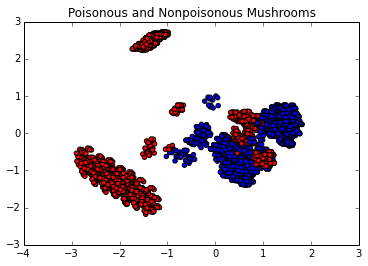

In [77]:
#def P2():
### STUDENT START ###

# initalize the constant for the number of components
COMPONENTS = 2

# create a principal component analysis limited to 2 dimensions
pca_2d = PCA(n_components=COMPONENTS)

# fit the model on the data
train_2d = pca_2d.fit_transform(train_data)

# define the colors for our plot
colrs_2d = ListedColormap(['#0000FF','#FF0000'])

# plot the data
plt.subplot(1, 1, 1)
plt.scatter(train_2d[:,0], train_2d[:,1], c=train_labels, cmap=colrs_2d)
plt.title("Poisonous and Nonpoisonous Mushrooms")
plt.show()

### STUDENT END ###

#P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

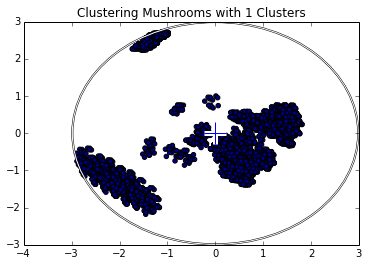

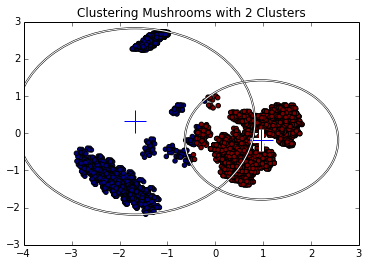

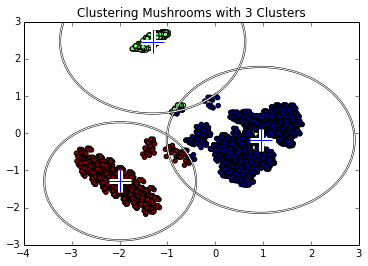

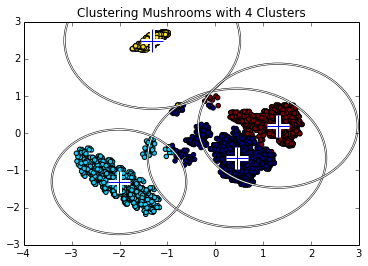

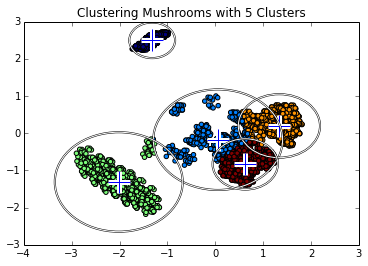

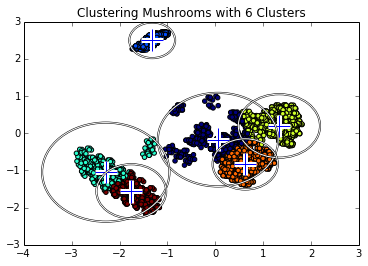

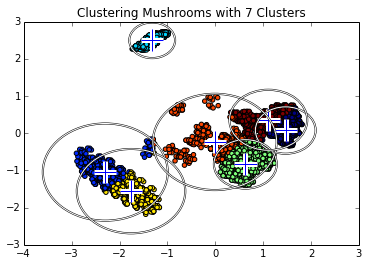

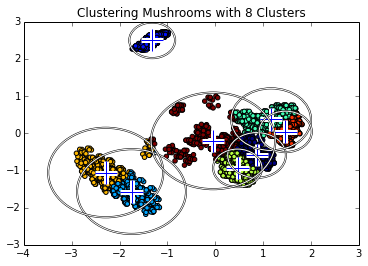

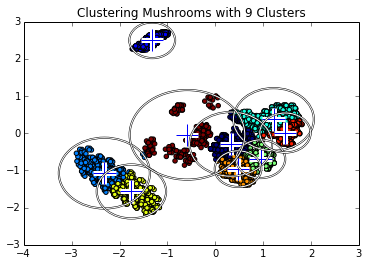

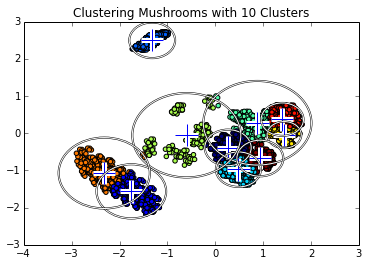

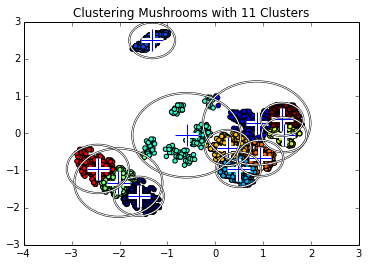

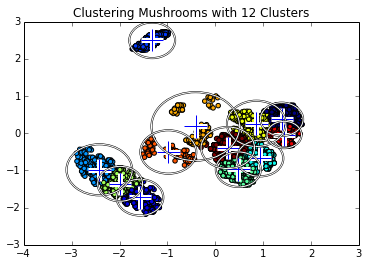

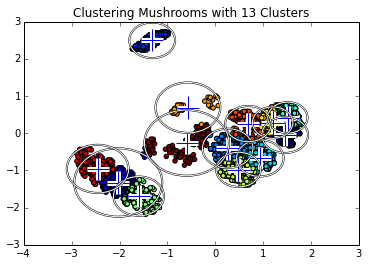

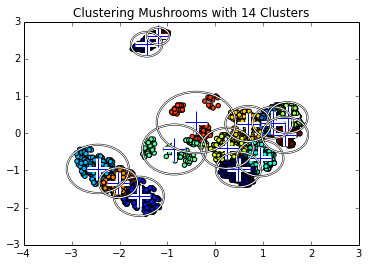

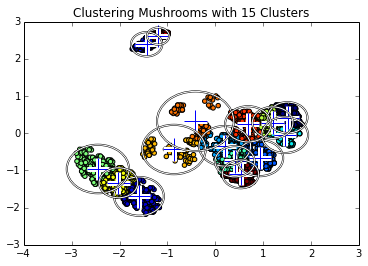

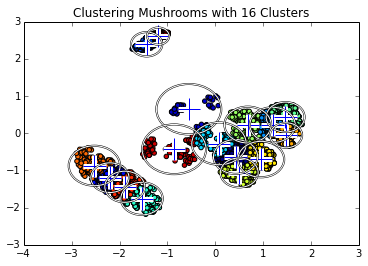

In [78]:
#def P3():
### STUDENT START ###

# create a function to find the distance between two points
def distance(x1,y1,x2,y2):
    """finds the cartesian distance between two points"""
    
    # calculate the distance between the x's and y's
    horizontal = (x2-x1)**2
    vertical = (y2-y1)**2
    
    # sums the distances and squares them, applies the pythagorean formula
    sum_dist = horizontal + vertical
    dist = np.sqrt(sum_dist)
    return dist

# set the constant for the clusters we wish to consider
CLUSTERS = range(1,17)

# loop through each possible iteration of clusters
for cluster_num in CLUSTERS:
    
    # create a K means model
    _k_means = KMeans(n_clusters=cluster_num)
    
    # fit the model to the data
    _train_clusters = _k_means.fit_predict(train_2d)
    
    # plot the data colored by clusters
    graph = plt.subplot(1, 1, 1)
    plt.scatter(train_2d[:,0], train_2d[:,1], c=_train_clusters)
    _plt_title = "Clustering Mushrooms with " + str(cluster_num) + " Clusters"
    
    # plot the center of each cluster
    plt.scatter(_k_means.cluster_centers_[:,0], _k_means.cluster_centers_[:,1], c='white', 
                s=500, marker="+", linewidths=5)
    plt.scatter(_k_means.cluster_centers_[:,0], _k_means.cluster_centers_[:,1], s=500, marker="+", linewidths=1)
    
    
    # create an array to hold the maximum distance for each cluster
    maxes = np.zeros(cluster_num)
    
    # loop through every point in the data
    for index,point in enumerate(train_2d):
        
        # find the point's assigned cluster
        _assigned = _train_clusters[index]
        
        # grab the coordinates of that point
        _point_x = train_2d[index,0]
        _point_y = train_2d[index,1]
        
        # grab the coordinate of the center point
        _center_x = _k_means.cluster_centers_[_assigned,0]
        _center_y = _k_means.cluster_centers_[_assigned,1]
        
        # grab the distance of that point from that centroid
        _point_distance = distance(_point_x, _point_y, _center_x, _center_y)
        
        # if the distance is greater than the current max distance, 
        # replace the current max distance
        if _point_distance > maxes[_assigned]:
            maxes[_assigned] = _point_distance
            
    # plot the circles around each center point
    for index, radius in enumerate(maxes):
        
        # get the center points of the circle
        _circle_x = _k_means.cluster_centers_[index,0]
        _circle_y = _k_means.cluster_centers_[index,1]
        
        # create the pyplot circle and add it to the graph
        _circle_inner = plt.Circle((_circle_x, _circle_y), radius, fill=False, color='white', linewidth=1)
        _circle_outer = plt.Circle((_circle_x, _circle_y), radius, fill=False, color='black', linewidth=2)
        graph.add_patch(_circle_outer)
        graph.add_patch(_circle_inner)
    
    # add the title and show the plot
    plt.title(_plt_title)
    plt.show()
    

### STUDENT END ###

#P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

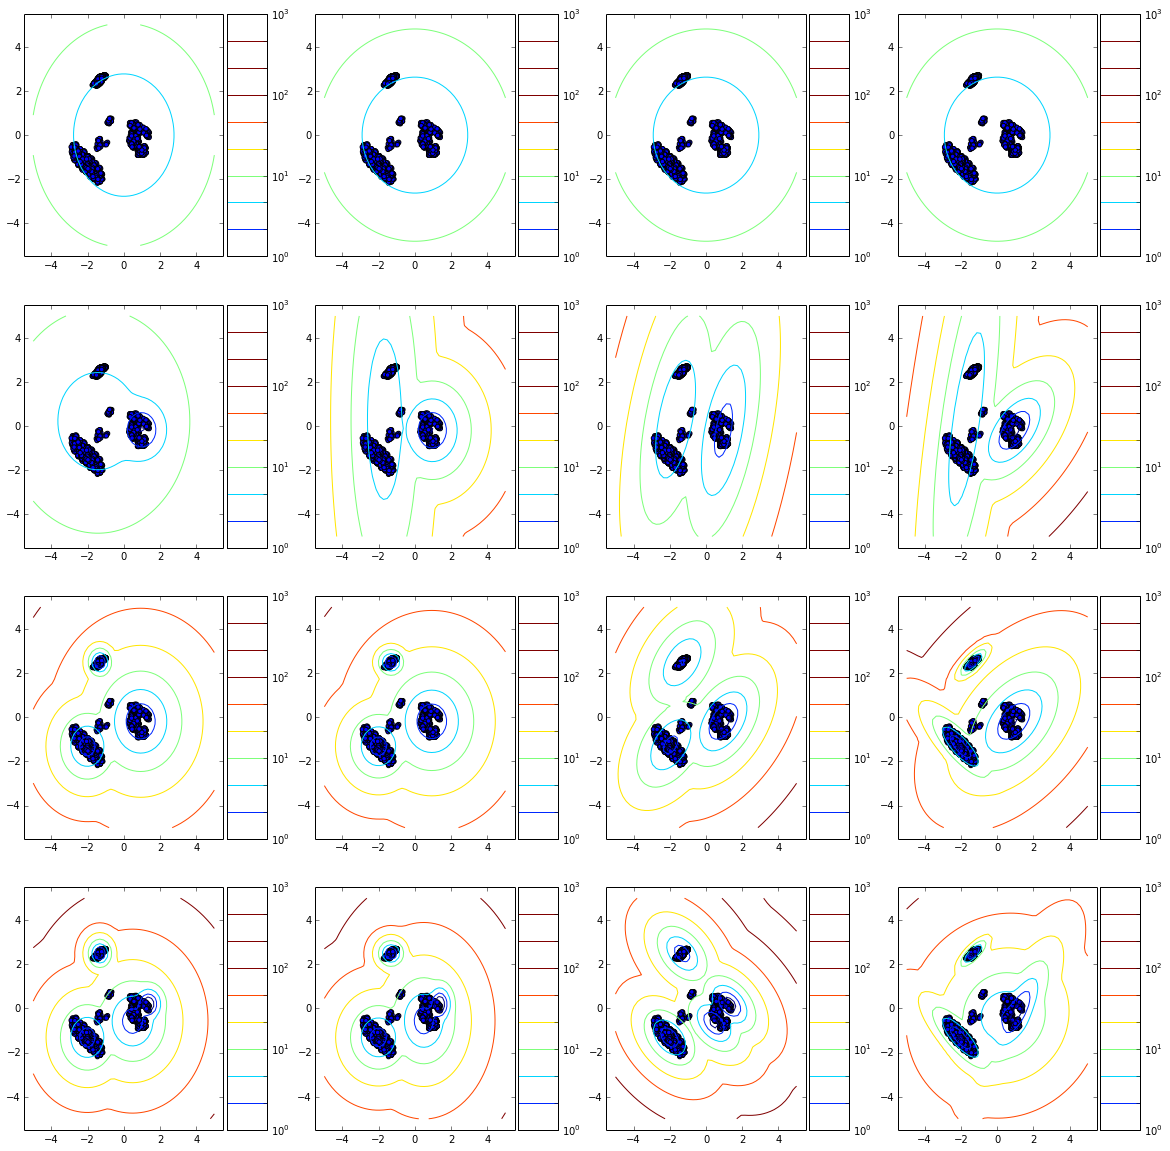

In [79]:
#def P4():
### STUDENT START ###

# create the array for only the positive mushrooms
train_2d_positive = train_2d[train_labels==1]

# set covariance matrix types we're interested in
COVARIANCES = ['spherical', 'diag', 'tied', 'full']

# set the range of mixture components
MIX_COMPONENTS = range(1,5)

# create a set of plots to compare the mixture components and the covariance types
f, subs = plt.subplots(len(MIX_COMPONENTS),len(COVARIANCES),figsize=(20,20))

# loop through the mixture components
for index_i, mix_component in enumerate(MIX_COMPONENTS):
    
    # loop through the covariance matrix options
    for index_j, covariance in enumerate(COVARIANCES):
        
        # set the active plot
        _graph = subs[index_i, index_j]
        
        # create a new Gaussian mixture model
        _gmm = GMM(n_components = mix_component, covariance_type = covariance)
        
        # fit the model on the 2-d training data
        _train_probabilities = _gmm.fit_predict(train_2d)
        
        # create the countour plot by creating the grid space
        x = np.linspace(-5.0, 5.0)
        y = np.linspace(-5.0, 5.0)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        
        # get the log likelihoods for each grid point
        Z = -_gmm.score_samples(XX)[0]
        Z = Z.reshape(X.shape)
        
        # create the plot contours for the subplot
        contours = _graph.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0), 
                               levels=np.logspace(0, 3, 10))
        
        # append the axes to right of the subplot
        _divider = make_axes_locatable(_graph)
        _color_axis = _divider.append_axes("right", size="20%", pad=0.05)
        
        # create the color bar in the appended axis
        _color_bar = plt.colorbar(contours, cax=_color_axis, extend='both')
        
        _graph.scatter(train_2d_positive[:,0], train_2d_positive[:,1])
        
### STUDENT END ###

#P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [80]:
#def P5():
### STUDENT START ###

# create the positive and negative training data
train_2d_positive = train_2d[train_labels==1]
train_2d_negative = train_2d[train_labels==0]

# create the two 4 component full covariance GMMs
COMPONENT = 4
COVAR_TYPE = 'full'
positive_GMM = GMM(n_components = COMPONENT, covariance_type = COVAR_TYPE)
negative_GMM = GMM(n_components = COMPONENT, covariance_type = COVAR_TYPE)

# fit each model on its corresponding training data
positive_GMM.fit(train_2d_positive)
negative_GMM.fit(train_2d_negative)

# reduce the test data to the same 2 dimensions
test_2d = pca_2d.transform(test_data)

# get the log probability for each of the training data points
prob_positive = positive_GMM.score(test_2d)
prob_negative = negative_GMM.score(test_2d)

# create an array to hold the guesses of the models
# array is based on whichever model has the larger probability
guesses = []

# loop through each example in the training data
for index_i in range(len(prob_positive)):
    
    # if the positive model has a greater probability
    if prob_positive[index_i] > prob_negative[index_i]:
        guesses.append(1)
    
    # else (if the negative model has a greater probability or the probabilites are equal)
    else:
        guesses.append(0)

# compare the guesses to the actual labels and compute the accuracy as the percentage correct
accuracy = np.mean(guesses == test_labels)

# print concluding statement
print "The accuracy of two 4-component, full covariance GMM models is", accuracy

### STUDENT END ###

#P5()

The accuracy of two 4-component, full covariance GMM models is 0.951067615658


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

mean vectors = PCA components

components = GMM groups your have

2 classes = 1 for positive and 1 for negative

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [81]:
#def P6():
### STUDENT START ###

# set the range of possible PCA components
pca_components = range(1,10)

# set the range of possible GMM groups
gmm_groups = range(1,10)

# set the covariance types
COVARIANCES = ['spherical', 'diag', 'tied', 'full']

# create arrays to hold potential results
potential_pca_number = []
potential_gmm_groups = []
potential_covariance = []
potential_accuracies = []

# create a function to calculate the accuracies of the model
def calculateAccuracy(model_pos, model_neg, data, labels):
    """Use two models to predict the likelihood that a data point belongs to one or another
    group (positive or negative). Returns the accuracies of the two models as a percentage of
    data points guessed correctly"""

    # create an array to hold the guesses of the models
    # array is based on whichever model has the larger probability
    guesses = []

    # calculate the likelihoods for each model on the data
    prob_positive = model_pos.score(data)
    prob_negative = model_neg.score(data)
    
    # loop through each example in the data
    for index_i in range(len(data)):

        # if the positive model has a greater probability
        if prob_positive[index_i] > prob_negative[index_i]:
            guesses.append(1)

        # else (if the negative model has a greater probability or the probabilites are equal)
        else:
            guesses.append(0)

    # compare the guesses to the actual labels and compute the accuracy as the percentage correct
    accuracy = np.mean(guesses == labels)
    
    # return the accuracy
    return accuracy

# consider possible number of PCA components
for pca_component_number in pca_components:
    
    # consider possible number of GMM groups
    for gmm_group_num in gmm_groups:
        
        # consider possible covariance types
        for covar_type in COVARIANCES:
            
            # create a principal component analysis limited to dimensions
            # and fit it on the training data
            _pca = PCA(n_components=pca_component_number)
            _train = _pca.fit_transform(train_data)
            
            # create distinct positive and negative sets of training data
            _train_positive = _train[train_labels==1]
            _train_negative = _train[train_labels==0]
            
            # create positive and negative GMM models based on the positive and 
            # negative training data AND on the GMM group number and the covariance type
            _gmm_positive = GMM(n_components = gmm_group_num, covariance_type = covar_type)
            _gmm_positive.fit(_train_positive)
            _gmm_negative = GMM(n_components = gmm_group_num, covariance_type = covar_type)
            _gmm_negative.fit(_train_negative)
            
            # measure the number of parameters for each model
            sum_paramters = _gmm_positive._n_parameters() + _gmm_negative._n_parameters()
            
            # if the parameters are less than or equal to 50, lets compute
            # the accuracy and store information about the model
            if sum_paramters <= 50:
                # append the make-up of this model
                potential_pca_number.append(pca_component_number)
                potential_gmm_groups.append(gmm_group_num)
                potential_covariance.append(covar_type)
                
                # reduce the dimensions of the test data in the same way we did the training data
                _test = _pca.transform(test_data)
                
                # calculate the accuracy of the model and append it to the make-up array
                accuracy = calculateAccuracy(_gmm_positive,_gmm_negative,_test,test_labels)
                potential_accuracies.append(accuracy)
                
# convert our arrays to numpy arrays
potential_pca_number = np.array(potential_pca_number)
potential_gmm_groups = np.array(potential_gmm_groups)
potential_covariance = np.array(potential_covariance)
potential_accuracies = np.array(potential_accuracies)

# find the index in the array that has the maximum value
max_accuracy_index = np.argmax(potential_accuracies)

# print the concluding statement
print "The model that produced the highest accuracy with less than 50 parameters produced an \
accuracy of", potential_accuracies[max_accuracy_index], ". The model reduced the data to \
just", potential_pca_number[max_accuracy_index], "dimensions. It used\
", potential_gmm_groups[max_accuracy_index], "GMM groups and a covariance type \
of", potential_covariance[max_accuracy_index]

                
### STUDENT END ###

#P6()

The model that produced the highest accuracy with less than 50 parameters produced an accuracy of 0.967971530249 . The model reduced the data to just 4 dimensions. It used 3 GMM groups and a covariance type of tied
